<h1>Estante</h1>
Proeficiência em python/pandas.
Limpeza e ajuste dos datasets
Modelagem do dado
Conhecimento de SQL
Resolução de problemas
Comunicação
Surpreender com algum plus/insight 
<h5>
O desafio é montar um relatório, por escolas, e salvar em um banco de dados. Este deve responder as seguintes perguntas:
<h5>Quantos alunos estão cadastrados?</h5>  DONE
<h5>Quantos livros foram produzidos?</h5>
<h5>Quantos livros foram vendidos?</h5>
<h5>Qual o faturamento ?</h5>
<h5>Qual o tipo de cliente que mais compra?</h5>
Este relatório é anual, ou seja, deve agrupar as informações pelo ano escolar.</h3>

In [75]:
%%time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Wall time: 6 ms


In [76]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 

from pandas.plotting import scatter_matrix
from tqdm import tqdm, tqdm_notebook
from scipy import stats
from sklearn import model_selection
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h1>Descriptive Analysis</h1>

In [77]:
import os

In [253]:
path = 'C:\\dev\\estante\\'
print(path)

file_names = []
for i, root, dirs in os.walk(path):
    for file in dirs:
        file_names.append(file)
print(file_names)
        

C:\dev\estante\
['alunos.csv', 'escolas.csv', 'livro.csv', 'pedido.csv', 'Untitled.ipynb', 'Untitled-checkpoint.ipynb']


In [254]:
df_alunos = pd.read_csv(file_names[:4][0]);df_alunos
df_alunos.columns = ['ID', 'Escola', 'Nome', 'Turma', 'Ano'];df_alunos
#df_alunos.set_index('Escola')

,ID,Escola,Nome,Turma,Ano
0,1,1,Paulo Francisco,1a. Série,2019
1,2,1,Roberto Sinval,1a. Série,2019
2,3,4,NaN,1a. Série,2015
3,4,3,Gisele Coelho,1a. Série,2019
4,5,2,Fagner Moura,1a. Série,2016
5,6,2,XIco,1a. Série,2019
6,7,1,José das Cruzes,1a. Série,2011
7,8,2,Maria Antonieta,1a. Série,2019
8,9,3,Paulo Coelho,1a. Série,2019
9,10,1,Fernando PEssoa,1a. Série,1990


In [255]:
df_escolas = pd.read_csv(file_names[:4][1]);df_escolas
df_escolas.columns = ['ID','Nome', 'Municipio', 'UF'];df_escolas

,ID,Nome,Municipio,UF
0,1,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,2,Ph,Rio de Janeiro,NaN
2,3,Anglo,São Paulo,SP


In [256]:
df_livro = pd.read_csv(file_names[:4][2]);df_livro
df_livro.columns = ['ID','Aluno', 'Ano'];df_livro
#df_livro.set_index('ID')

,ID,Aluno,Ano
0,1,7,2011
1,2,3,2015
2,3,4,2019
3,4,9,2018
4,5,12,2019
5,6,8,2019
6,7,6,2019
7,8,1,2019
8,9,2,2019
9,10,5,2019


In [257]:
df_pedido = pd.read_csv(file_names[:4][3]);df_pedido
df_pedido.columns = ['ID','Livro','Valor_Unitario', 'Quantidade']
df_pedido.set_index('ID')

,Livro,Valor_Unitario,Quantidade
ID,,,
1,1,10.0,5.0
2,3,10.0,12.0
3,6,8.0,3.0
4,5,20.0,5.0
5,4,15.0,9.0
6,7,0.0,0.0
7,10,3.0,6.0
8,9,10.0,14.5


### First query
### Quantos alunos estão cadastrados?

In [299]:
df_alunos_indexed = df_alunos.set_index('Escola');df_alunos_indexed

,ID,Nome,Turma,Ano
Escola,,,,
1,1,Paulo Francisco,1a. Série,2019
1,2,Roberto Sinval,1a. Série,2019
4,3,NaN,1a. Série,2015
3,4,Gisele Coelho,1a. Série,2019
2,5,Fagner Moura,1a. Série,2016
2,6,XIco,1a. Série,2019
1,7,José das Cruzes,1a. Série,2011
2,8,Maria Antonieta,1a. Série,2019
3,9,Paulo Coelho,1a. Série,2019


In [300]:
df_escolas_indexed = df_escolas.set_index('ID');df_escolas_indexed

,Nome,Municipio,UF
ID,,,
1,Escolinha Professor Raimundo,Rio de Janeiro,RJ
2,Ph,Rio de Janeiro,NaN
3,Anglo,São Paulo,SP


In [301]:
df_join_result = df_alunos_indexed.join(df_escolas_indexed,lsuffix='_caller');df_join_result

,ID,Nome_caller,Turma,Ano,Nome,Municipio,UF
1,1,Paulo Francisco,1a. Série,2019,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,2,Roberto Sinval,1a. Série,2019,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,7,José das Cruzes,1a. Série,2011,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,10,Fernando PEssoa,1a. Série,1990,Escolinha Professor Raimundo,Rio de Janeiro,RJ
2,5,Fagner Moura,1a. Série,2016,Ph,Rio de Janeiro,NaN
2,6,XIco,1a. Série,2019,Ph,Rio de Janeiro,NaN
2,8,Maria Antonieta,1a. Série,2019,Ph,Rio de Janeiro,NaN
3,4,Gisele Coelho,1a. Série,2019,Anglo,São Paulo,SP
3,9,Paulo Coelho,1a. Série,2019,Anglo,São Paulo,SP
4,3,NaN,1a. Série,2015,NaN,NaN,NaN


In [302]:
# we can dropped too much, we can fix the states by mapping to this database - https://github.com/kelvins/Municipios-Brasileiros/tree/master/csv
# simplest solution without using any cities db
states_map = {'RJ': ['Rio de Janeiro'],
              'SP': ['São Paulo']}

In [303]:
['São Paulo'] in states_map.values()

True

In [304]:
renamed_cities = []
for i in df_join_result['Municipio']:
    if [i] in states_map.values():
        listOfKeys = [key  for (key, value) in states_map.items() if value == [i]]
        renamed_cities.append(listOfKeys[0])
    else:
        renamed_cities.append(i)
print(renamed_cities)

['RJ', 'RJ', 'RJ', 'RJ', 'RJ', 'RJ', 'RJ', 'SP', 'SP', nan]


In [305]:
df_join_result['UF']= renamed_cities; df_join_result

,ID,Nome_caller,Turma,Ano,Nome,Municipio,UF
1,1,Paulo Francisco,1a. Série,2019,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,2,Roberto Sinval,1a. Série,2019,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,7,José das Cruzes,1a. Série,2011,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,10,Fernando PEssoa,1a. Série,1990,Escolinha Professor Raimundo,Rio de Janeiro,RJ
2,5,Fagner Moura,1a. Série,2016,Ph,Rio de Janeiro,RJ
2,6,XIco,1a. Série,2019,Ph,Rio de Janeiro,RJ
2,8,Maria Antonieta,1a. Série,2019,Ph,Rio de Janeiro,RJ
3,4,Gisele Coelho,1a. Série,2019,Anglo,São Paulo,SP
3,9,Paulo Coelho,1a. Série,2019,Anglo,São Paulo,SP
4,3,NaN,1a. Série,2015,NaN,NaN,NaN


In [306]:
# dropping possible typos and garbage data
df_dense = df_join_result.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False);df_dense

,ID,Nome_caller,Turma,Ano,Nome,Municipio,UF
1,1,Paulo Francisco,1a. Série,2019,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,2,Roberto Sinval,1a. Série,2019,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,7,José das Cruzes,1a. Série,2011,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,10,Fernando PEssoa,1a. Série,1990,Escolinha Professor Raimundo,Rio de Janeiro,RJ
2,5,Fagner Moura,1a. Série,2016,Ph,Rio de Janeiro,RJ
2,6,XIco,1a. Série,2019,Ph,Rio de Janeiro,RJ
2,8,Maria Antonieta,1a. Série,2019,Ph,Rio de Janeiro,RJ
3,4,Gisele Coelho,1a. Série,2019,Anglo,São Paulo,SP
3,9,Paulo Coelho,1a. Série,2019,Anglo,São Paulo,SP


In [307]:
unique_college = df_dense['Nome'].unique(); unique_college

array(['Escolinha Professor Raimundo', 'Ph', 'Anglo'], dtype=object)

In [308]:
df_dense[df_dense['Nome'] == 'Ph'].count().ID

3

### Result of first query using a pandas mask(filter) to aggregate the data

In [310]:
df_collection = []
for i,name in enumerate(unique_college):
    filter_result = df_dense[df_dense['Nome'] == name].count().ID
    result_df = {'name': name,
                 'total':filter_result
    }
    df_collection.append(result_df)
result_df = pd.DataFrame(df_collection);result_df

,name,total
0,Escolinha Professor Raimundo,4
1,Ph,3
2,Anglo,2


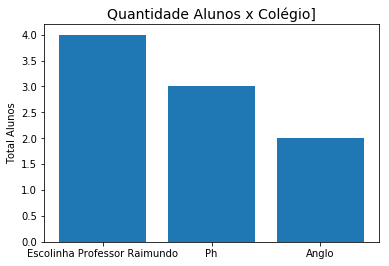

In [314]:
plt.bar(result_df['name'], result_df['total'])
plt.title('Quantidade Alunos x Colégio]', size=14)
plt.ylabel('Total Alunos')
plt.show()

### Since we did the first  query using pandas, now we will query using a SQL  approach

In [315]:
# setting some sql servers containers instances using the following Docker commands

devops = """

    ###### ------------------------------------------------------------
    ######   SQL Server - Linux
    ###### ------------------------------------------------------------
    docker volume create sql_data
    docker volume rm -f sql_data
    docker search microsoft
    docker run -d --name 'SQLServer' -v sql_data:/sql_data  -e 'ACCEPT_EULA=Y' -e 'MSSQL_SA_PASSWORD=1q2w3e%&!' -p 1433:1433 microsoft/mssql-server-linux


    # ------------------------------------------------------------
    #   POSTGRES
    # ------------------------------------------------------------
    docker volume create postgres_data
    docker volume rm -f postgres_data
    docker run -d --name PostgreSQL -v postgres_data:/postgres_data -e POSTGRES_PASSWORD=docker  -p 5433:5432 postgres


    # ------------------------------------------------------------
    #   Mongo DB
    # ------------------------------------------------------------
    docker volume create mongodb_data
    docker volume create mongodb_data
    docker run -d --name MongoDB -v mongodb_data:/mongodb_data -p 27005:27017 mongo
"""

In [322]:
df_escolas

,ID,Nome,Municipio,UF
0,1,Escolinha Professor Raimundo,Rio de Janeiro,RJ
1,2,Ph,Rio de Janeiro,NaN
2,3,Anglo,São Paulo,SP


In [2]:
# SQL Server 
#4df_escolas.columns = ['ID','Nome', 'Municipio', 'UF'] # normalizing should decople the address

In [36]:
seed = """
        USE master
        GO
        CREATE DATABASE Estante
        GO

        USE Estante
        CREATE TABLE Escola (
                                 ID INT IDENTITY(1,1) PRIMARY KEY,
                                 Nome nvarchar(max) not null, 
                                 Municipio nvarchar(max) not null, 
                                 UF nvarchar(2) not null,
                     )
        GO
        
      BEGIN TRANSACTION 
                               INSERT INTO Escola (Nome, Municipio, UF)
                               VALUES ( 'Escolinha Professor Raimundo', 'Rio de Janeiro', 'RJ')

      COMMIT TRANSACTION
"""

In [37]:
# should refact to a repository layer and use a config file before production
import pyodbc
def connectToLocalSQLServer():
    
    server = '127.0.0.1,1433' 
    database = 'Estante' 
    username = 'sa' 
    password = '1q2w3e%&!' 

    cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};'
                          'SERVER=' + server +
                          ';DATABASE=' + database +
                          ';UID=' + username +
                          ';PWD=' + password)
    return cnxn

In [38]:
cnxn = connectToLocalSQLServer()
cursorSQL = cnxn.cursor()
print(cursorSQL)

In [39]:
sql_query = "SELECT TOP(10) * FROM [Estante].[dbo].[Escola]"
with cursorSQL:
    query_result = cursorSQL.execute(sql_query)
    for i in query_result:
        print(i)

    cursorSQL.commit()

(1, 'Escolinha Professor Raimundo', 'Rio de Janeiro', 'RJ')


In [40]:
# Now that the dabase its set, we start the normalization phase 